## Decoding Customer Shopping Trends: A Modern Analysis


In [452]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, cluster
from pandas.plotting import scatter_matrix

import os

In [321]:
df = pd.read_csv("shopping_trends.csv")

In [322]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [324]:
df.index = df["Customer ID"]


In [325]:
del df["Customer ID"]

In [326]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly


In [327]:
df.shape

(3900, 18)

In [328]:
df.count()

Age                         3900
Gender                      3900
Item Purchased              3900
Category                    3900
Purchase Amount (USD)       3900
Location                    3900
Size                        3900
Color                       3900
Season                      3900
Review Rating               3900
Subscription Status         3900
Payment Method              3900
Shipping Type               3900
Discount Applied            3900
Promo Code Used             3900
Previous Purchases          3900
Preferred Payment Method    3900
Frequency of Purchases      3900
dtype: int64

In [329]:
df.isnull().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [330]:
categorical = df.dtypes[df.dtypes == "object"].index

In [331]:
categorical

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [332]:
for i in categorical:
    res = sorted(df[i].unique())
    print(i, ": ",res,"\n")

Gender :  ['Female', 'Male'] 

Item Purchased :  ['Backpack', 'Belt', 'Blouse', 'Boots', 'Coat', 'Dress', 'Gloves', 'Handbag', 'Hat', 'Hoodie', 'Jacket', 'Jeans', 'Jewelry', 'Pants', 'Sandals', 'Scarf', 'Shirt', 'Shoes', 'Shorts', 'Skirt', 'Sneakers', 'Socks', 'Sunglasses', 'Sweater', 'T-shirt'] 

Category :  ['Accessories', 'Clothing', 'Footwear', 'Outerwear'] 

Location :  ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [333]:
df.dtypes.index

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Age by Groups

In [334]:
bins = [0,12,19,35,64,100]
labels = ["children" , "teenagers","young adults","adults","seniors"]
new_range = pd.cut(df["Age"],bins = bins ,labels=labels,right=True)
df["Age"] = new_range

In [335]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,adults,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,teenagers,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,adults,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,young adults,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,adults,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,adults,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3897,adults,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,adults,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly


### Defining the order of the season based on the Northern Hemisphere.

In [336]:
df["Season"]

Customer ID
1       Winter
2       Winter
3       Spring
4       Spring
5       Spring
         ...  
3896    Summer
3897    Spring
3898    Spring
3899    Summer
3900    Spring
Name: Season, Length: 3900, dtype: object

In [337]:
df["Season"]

Customer ID
1       Winter
2       Winter
3       Spring
4       Spring
5       Spring
         ...  
3896    Summer
3897    Spring
3898    Spring
3899    Summer
3900    Spring
Name: Season, Length: 3900, dtype: object

In [338]:
season_order = ["Spring", "Summer", "Fall", "Winter"]
new_season = pd.Categorical(df["Season"], categories=season_order, ordered=True)
df["Season"] = new_season


df["Season"].unique()

['Winter', 'Spring', 'Summer', 'Fall']
Categories (4, object): ['Spring' < 'Summer' < 'Fall' < 'Winter']

In [339]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,adults,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,teenagers,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,adults,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,young adults,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,adults,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,adults,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3897,adults,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,adults,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly


In [340]:
df["Season"]

Customer ID
1       Winter
2       Winter
3       Spring
4       Spring
5       Spring
         ...  
3896    Summer
3897    Spring
3898    Spring
3899    Summer
3900    Spring
Name: Season, Length: 3900, dtype: category
Categories (4, object): ['Spring' < 'Summer' < 'Fall' < 'Winter']

### Rating Conversion

In [341]:
to_percent_rating = df["Review Rating"].apply(lambda X:X/5)
df["Review Rating"] = to_percent_rating

In [342]:
df.head(2)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,adults,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,0.62,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,teenagers,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,0.62,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


In [343]:
obj  = df.dtypes[df.dtypes == "object"].index
obj

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


The analysis of categorical and boolean columns highlights significant customer trends. A majority of the customer base, __2,652 out of 3,900,__ consists of males. The most popular item among purchases is __blouses,__ categorized under clothing. Seasonal trends indicate that spring accounts for the highest number of transactions. Additionally, most customers have not subscribed to any services. While __PayPal__ emerges as the most preferred payment method, __credit cards__ account for the majority of completed transactions.

In [344]:
df[obj].describe()

,Gender,Item Purchased,Category,Location,Size,Color,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,2847,696,675,2223,2223,677,584


In [345]:
df.describe()

,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000
mean,59.764359,0.749990,25.351538
std,23.685392,0.143245,14.447125
min,20.000000,0.500000,1.000000
25%,39.000000,0.620000,13.000000
50%,60.000000,0.740000,25.000000
75%,81.000000,0.880000,38.000000
max,100.000000,1.000000,50.000000


Gender Distribution
As shown, most customers are __Male__ with a total of 2652 (68%). Meanwhile, __Female__ garners a total of 1248 (32%).

In [346]:
df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [347]:
gender = df["Gender"].value_counts(normalize=True)

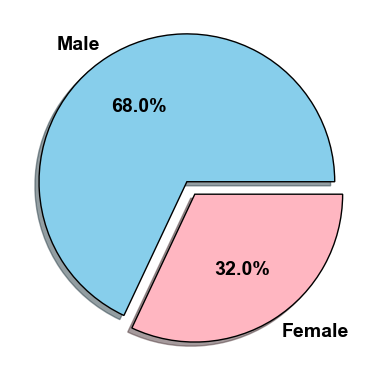

In [348]:
plt.pie(gender, 
        labels=gender.index, 
        autopct='%1.1f%%', 
        explode=(0.1, 0),  
        colors=["skyblue", "lightpink"],
        wedgeprops={"edgecolor":"black", "linewidth":1},
        shadow=True,       
        textprops={'fontsize': 14, 'color': 'black', 'weight': 'bold'})
plt.show()

Age Distribution
Most costumers are __Adults__ followed by __Young Adults and Seniors__. Meanwhile, __teenangers__ got the lowest number in distribution.

In [349]:
df.Age.value_counts()

Age
adults          2160
young adults    1163
seniors          427
teenagers        150
children           0
Name: count, dtype: int64

C:\Users\nitin\AppData\Local\Temp\ipykernel_7964\1117022828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age", palette="pastel")


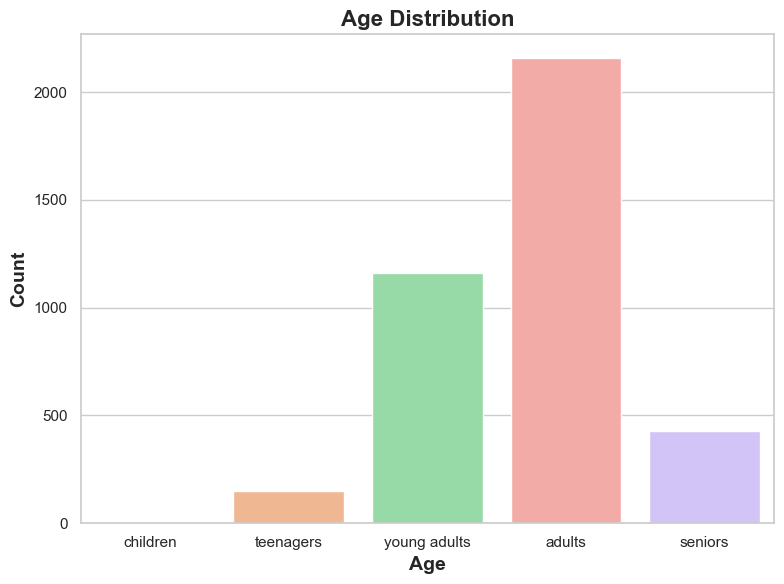

In [350]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Age", palette="pastel")
plt.xlabel('Age', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.title('Age Distribution', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

### Sales Analysis:

The sales data reveals that **Jewelry**, **Blouse**, and **Pants** are the most popular items, with a combined total of **171 purchases** across these categories. **Shirts** follow closely, totaling **169 purchases**, demonstrating strong demand as well. On the other hand, **Jeans** recorded the lowest sales, with only **124 purchases**, indicating relatively lower consumer interest compared to the other categories.


In [351]:
item = df["Item Purchased"].value_counts(sort=True)

<Axes: title={'center': 'Items by no. of Purchases'}, xlabel='items', ylabel='frequency of orders'>

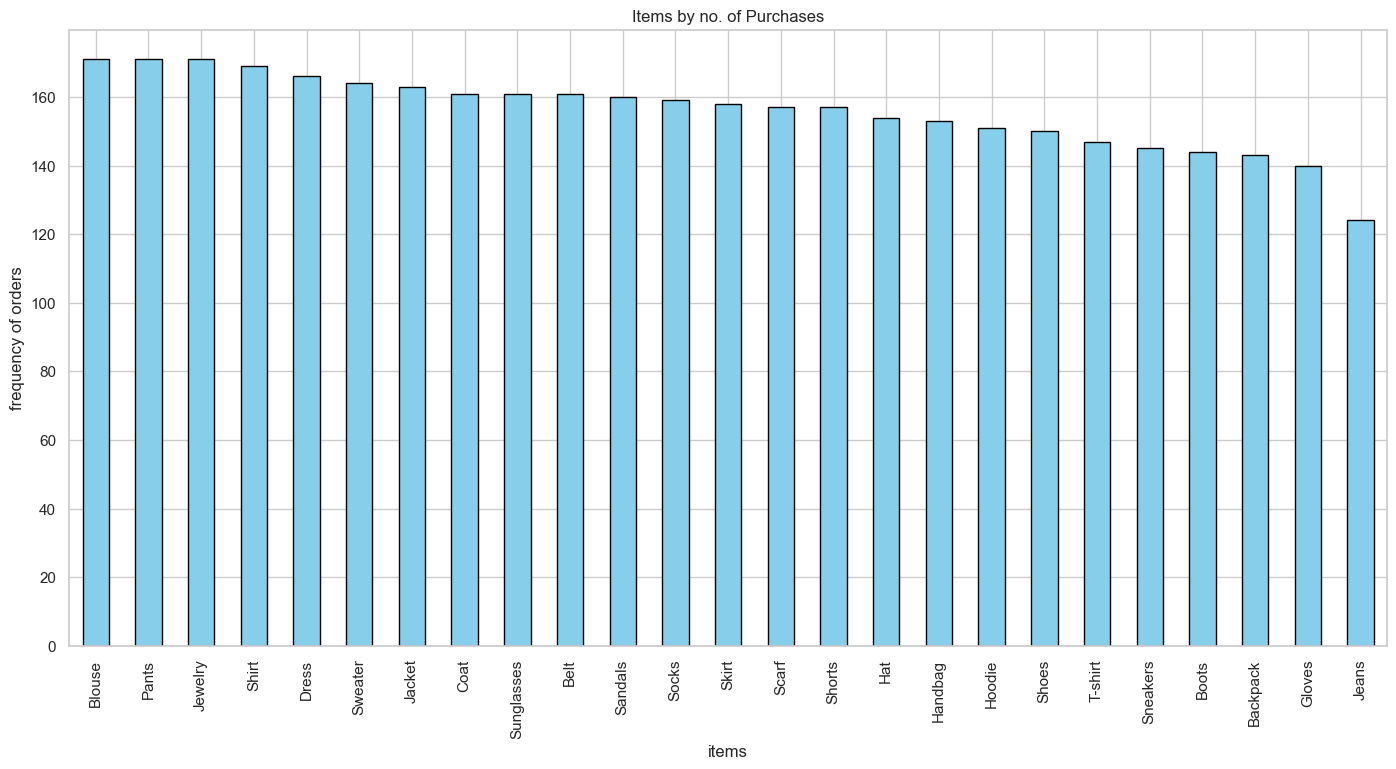

In [352]:
item.plot(kind="bar", title="Items by no. of Purchases", ylabel="frequency of orders", xlabel="items", figsize=(17, 8), 
          legend=False, edgecolor="black", grid=True, color="skyblue")

In [353]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Review Ratings Analysis

The analysis of the review ratings reveals that **Gloves** exhibit the highest mean rating, indicating strong customer satisfaction in this category. Conversely, **Shirts** have the lowest mean rating, suggesting relatively lower customer satisfaction. This insight highlights that customers are generally more satisfied with their purchases of gloves compared to shirts, which may require further investigation into factors affecting customer dissatisfaction in that category.


In [354]:
item_rating = df.groupby("Item Purchased")["Review Rating"].mean().sort_values(ascending=False).reset_index()

<Axes: xlabel='Item Purchased'>

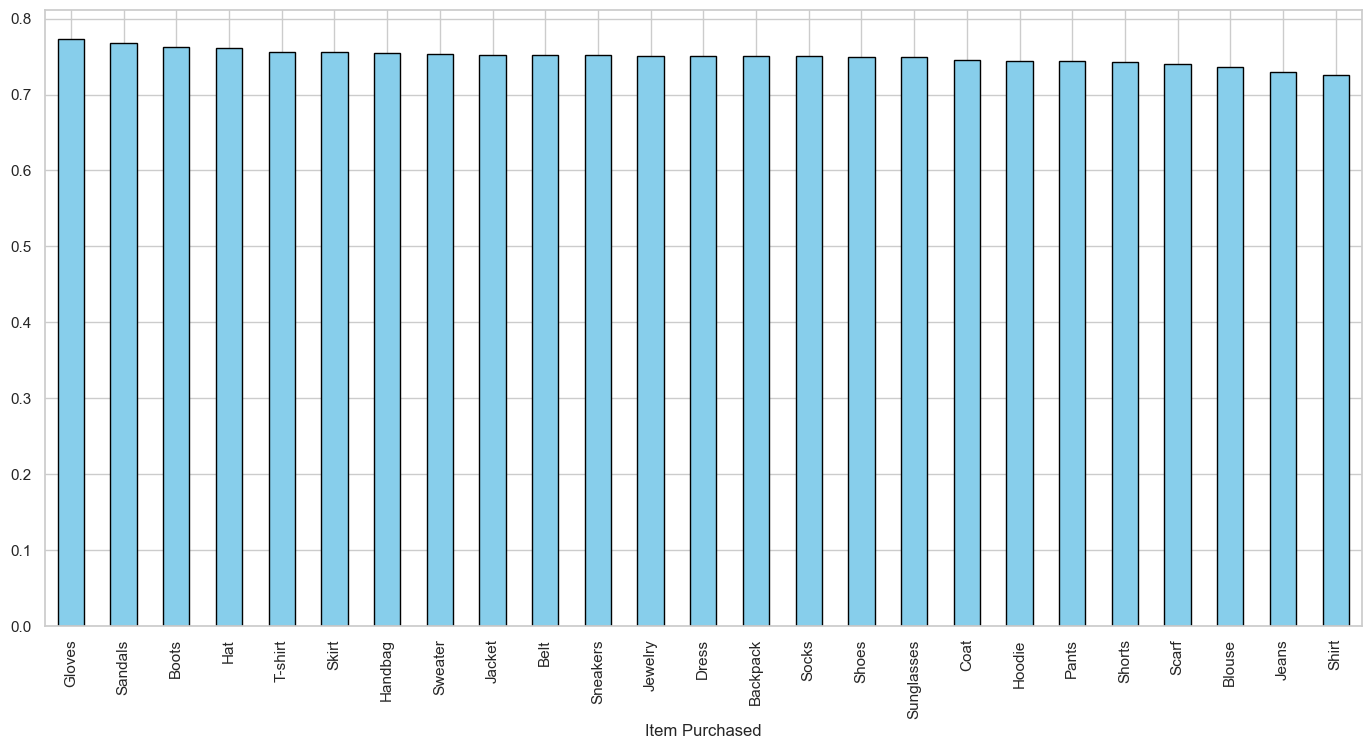

In [355]:
item_rating.plot(kind = "bar", x ="Item Purchased",y ="Review Rating",grid=True, edgecolor="black", color="skyblue",legend=False,figsize=(17, 8))

### Number of Purchases by Location

The analysis of purchase data indicates that **Montana** has the highest number of purchases, totaling **96**. In contrast, **Rhode Island** recorded the lowest number of purchases. This disparity suggests that regional factors may influence purchasing behavior, and further investigation could help identify opportunities to increase engagement and sales in underperforming locations.

In [356]:
df["Location"].value_counts().reset_index().head()

,Location,count
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89


In [357]:
top_mon = df[df["Location"] =="Montana"]["Item Purchased"].value_counts()

### Analysis of Top Items by Location
The analysis reveals the top items purchased across various locations. For instance, in **Alabama**, the most purchased item is **Jewelry**. Interestingly, even though **Shirt** has the lowest average rating, it remains the top item purchased in **Illinois** and **Wyoming**. This suggests that certain items may have a higher purchase frequency regardless of their ratings, highlighting regional preferences.


In [358]:
top_mon.head()

Item Purchased
Coat       8
Sweater    7
Socks      6
Handbag    6
Jeans      6
Name: count, dtype: int64

In [359]:
unique_location = sorted(df["Location"].unique())

In [360]:
unique_location

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

### Most Frequent Item Purchased by Location

In [361]:
result = df.groupby('Location')['Item Purchased'].agg(lambda x: x.mode()[0])
print(result)


Location
Alabama            Jewelry
Alaska            Backpack
Arizona           Backpack
Arkansas            Gloves
California           Dress
Colorado            Hoodie
Connecticut           Coat
Delaware             Pants
Florida               Coat
Georgia              Dress
Hawaii             Handbag
Idaho                 Belt
Illinois             Shirt
Indiana              Skirt
Iowa               Sweater
Kansas              Blouse
Kentucky           Handbag
Louisiana           Hoodie
Maine                Shoes
Maryland             Skirt
Massachusetts        Boots
Michigan           Sandals
Minnesota            Skirt
Mississippi        Handbag
Missouri          Sneakers
Montana               Coat
Nebraska          Backpack
Nevada            Backpack
New Hampshire       Blouse
New Jersey            Belt
New Mexico          Hoodie
New York            Gloves
North Carolina      Gloves
North Dakota        Jacket
Ohio               Sandals
Oklahoma            Jacket
Oregon             

In [362]:
result.shape

(50,)

### Category Distribution Analysis

Looking at the data, **clothing** is the most popular category among consumers, with **accessories** coming in second. On the other hand, **outerwear** is the least purchased category, meaning fewer people are buying it compared to the others. This might be because people generally prefer clothing all year round, while outerwear purchases tend to happen more in colder months.


In [363]:
cate = df["Category"].value_counts(ascending=False).reset_index()
cate

,Category,count
0,Clothing,1737
1,Accessories,1240
2,Footwear,599
3,Outerwear,324


In [364]:
cat = pd.crosstab(df["Category"], columns="counts")
cat

col_0,counts
Category,
Accessories,1240
Clothing,1737
Footwear,599
Outerwear,324


array([<Axes: >], dtype=object)

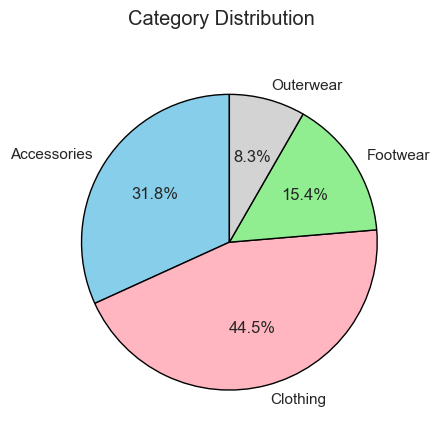

In [365]:
colors = ["skyblue", "lightpink", "lightgreen", "lightgrey"]
cat.plot(kind="pie", subplots=True, title="Category Distribution", ylabel="", legend=False, 
         wedgeprops={"edgecolor":"black"},autopct='%1.1f%%', startangle=90, colors=colors )


### Purchase Amount (USD) Frequency¶

In [366]:
amount = pd.crosstab(df["Purchase Amount (USD)"], columns="counts")
amount.sort_values(by="counts", ascending=False).head(5)

col_0,counts
Purchase Amount (USD),
36,62
32,62
94,62
51,61
90,60


<Axes: xlabel='amount (USD)', ylabel='freqeuncy'>

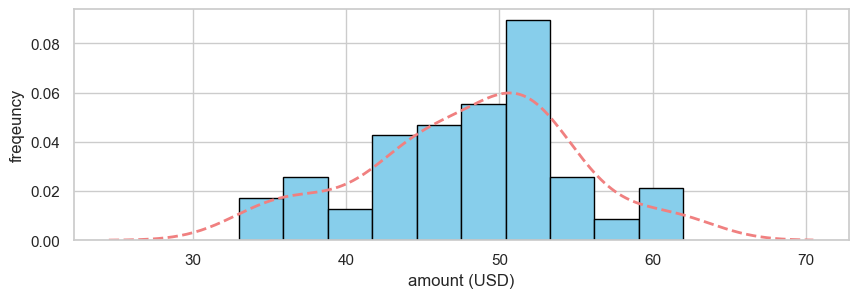

In [367]:
amount.plot.hist(grid=True, legend=False, xlabel="amount (USD)", ylabel="freqeuncy", density=True, 
                 edgecolor="black", color="skyblue", figsize=(10,3))
sns.kdeplot(amount["counts"], color="lightcoral", lw=2, linestyle="--")

### **Average Purchase Amount Among Age Groups**

From the data, we can see that **teenagers** spend the most on average compared to other age groups. Right after them, **young adults** come in second place for the highest average purchase amount.


In [368]:
avg_purchase = df.groupby("Age")["Purchase Amount (USD)"].mean().reset_index()


C:\Users\nitin\AppData\Local\Temp\ipykernel_7964\4079642796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase = df.groupby("Age")["Purchase Amount (USD)"].mean().reset_index()


<Axes: title={'center': 'Average Purchase Amount (USD) among Age Groups'}, xlabel='avg. purchase amount (USD)', ylabel='age groups'>

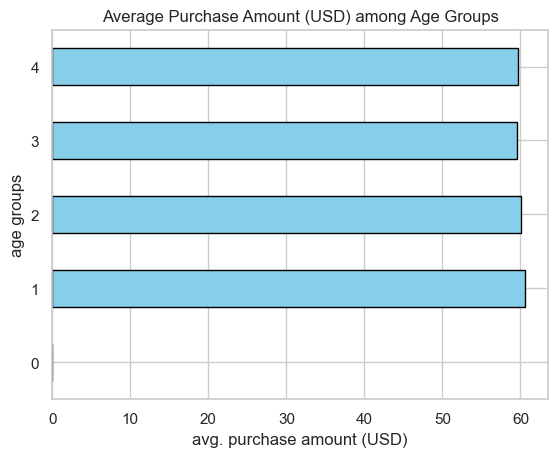

In [369]:
avg_purchase.plot.barh(legend=False, grid=True, xlabel="avg. purchase amount (USD)", ylabel="age groups",
                      title="Average Purchase Amount (USD) among Age Groups", edgecolor="black", color="skyblue")

### **Size Frequency**

Most people buy items in **Medium** size, with more than **1,755 purchases**. On the other hand, **Extra Large** size is the least popular.


In [370]:
size = df.groupby("Size").size().reset_index(name="counts").sort_values(by="counts", ascending=False)
print(size)

  Size  counts
1    M    1755
0    L    1053
2    S     663
3   XL     429


<Axes: title={'center': 'Size Frequency'}, xlabel='frequency of orders', ylabel='size'>

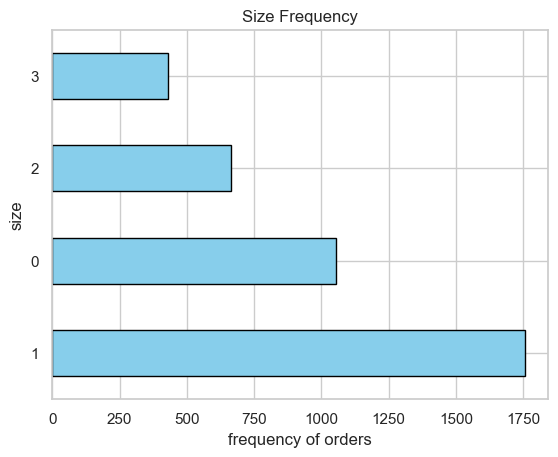

In [371]:
size.plot.barh(title="Size Frequency", grid=True, legend=False, edgecolor="black", 
               xlabel="frequency of orders", ylabel="size", color="skyblue")

### Seasonal Purchases Frequency  
**Spring** has the highest number of purchases with **999**, making it the most popular season. **Summer** has the lowest number of purchases with **955**.


In [372]:
seasons = df["Season"].value_counts().reset_index()

In [373]:
seasons

,Season,count
0,Spring,999
1,Fall,975
2,Winter,971
3,Summer,955


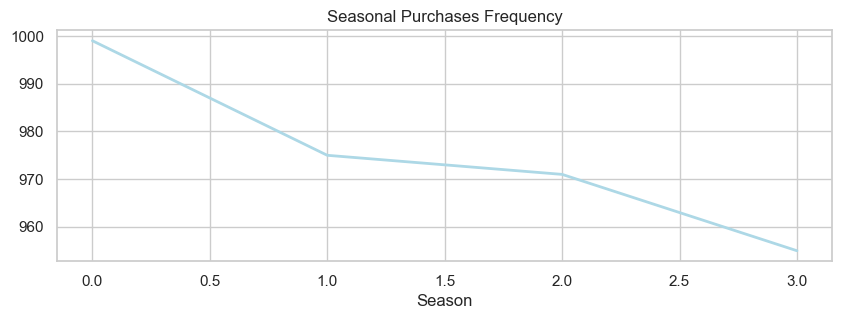

In [374]:
seasons.plot(kind="line", title="Seasonal Purchases Frequency", xlabel="Season", linewidth=2,
            figsize=(10,3), grid=True, legend=False, color="lightblue")
plt.show()

### Seasonal Average Expenses
Consumers tend to spend the __most in Fall and Winter__, indicating a higher average expense during these seasons. On the other hand, __Summer and Spring see slightly lower spending__, with consumers spending a bit less during these warmer months.

In [375]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [376]:
season_amount = df.groupby("Season")["Purchase Amount (USD)"].mean().reset_index()

C:\Users\nitin\AppData\Local\Temp\ipykernel_7964\4283095270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_amount = df.groupby("Season")["Purchase Amount (USD)"].mean().reset_index()


<Axes: title={'center': 'Avg. Expenses by Season'}, xlabel='season', ylabel='avg. amount (USD)'>

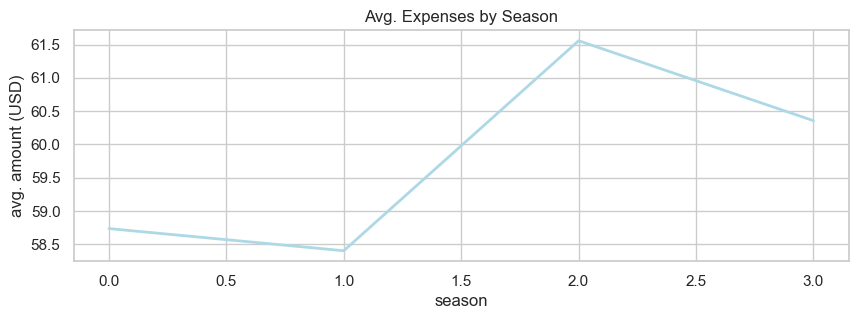

In [377]:
season_amount.plot(kind="line", legend=False, grid=True, color="lightblue", linewidth=2,
                   ylabel="avg. amount (USD)", xlabel="season", figsize=(10,3), title="Avg. Expenses by Season")

### Seasonal Item Purchase

In [378]:
seasonal_item = pd.crosstab(df["Item Purchased"],df["Season"])
seasonal_item = seasonal_item.T
seasonal_item

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Season,,,,,,,,,,,,,,,,,,,,,
Spring,39,41,46,40,46,43,42,36,27,36,...,41,42,40,47,46,39,40,33,52,38
Summer,45,39,43,38,42,47,29,35,37,31,...,43,38,46,40,28,36,42,37,28,30
Fall,34,41,42,35,34,36,37,48,50,36,...,40,39,26,35,46,31,42,39,42,39
Winter,25,40,40,31,39,40,32,34,40,48,...,33,50,38,35,38,39,35,52,42,40


In [379]:
seasonal_item.idxmax(axis=1)

Season
Spring       Sweater
Summer         Pants
Fall          Jacket
Winter    Sunglasses
dtype: object

### Colors
Most consumers prefer the __color Olive__, followed by __Yellow__, __Silver__, and __Teal__. Meanwhile,__Gold__ is the least preferred color.

In [380]:
colors = df["Color"].value_counts().reset_index()
colors.head()

,Color,count
0,Olive,177
1,Yellow,174
2,Silver,173
3,Teal,172
4,Green,169


<Axes: title={'center': 'Colors by Popularity'}, xlabel='color', ylabel='frequency'>

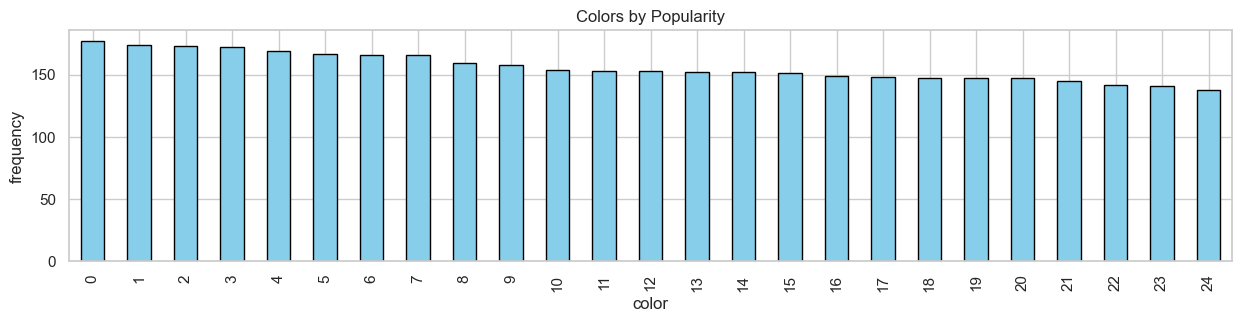

In [381]:
colors.plot(kind="bar", title="Colors by Popularity", xlabel="color", ylabel="frequency",
           figsize=(15,3), grid=True, edgecolor="black", legend=False, color="skyblue")

### Subscription Status
Most customers **do not have a subscription** with a total **2847**. This is against the total of **1053** who have a **current subscription**.

In [382]:
subs = pd.crosstab(df["Subscription Status"],columns = "counts").sort_values(by = "counts",ascending=True)
subs

col_0,counts
Subscription Status,
Yes,1053
No,2847


In [383]:
subsi = df["Subscription Status"].value_counts(ascending= False).reset_index()
subsi

,Subscription Status,count
0,No,2847
1,Yes,1053


C:\Users\nitin\AppData\Local\Temp\ipykernel_7964\2664632087.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subsi,x = "Subscription Status",y = "count",palette='Set2')


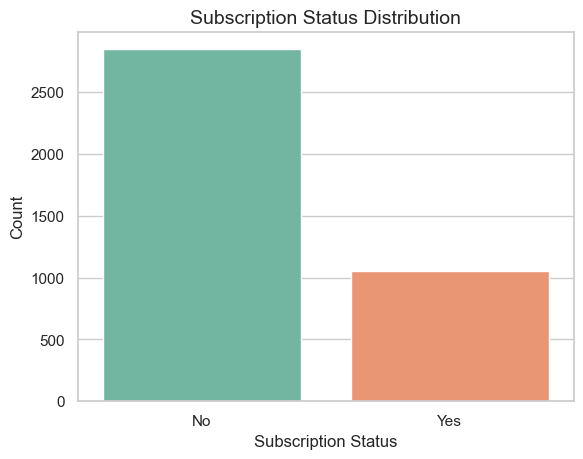

In [384]:
sns.barplot(data=subsi,x = "Subscription Status",y = "count",palette='Set2')
plt.title('Subscription Status Distribution', fontsize=14)
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Payment Method

As observed, the most commonly preferred payment method is **Credit Card**. Following that, people tend to use **Venmo**, **Cash**, and **Paypal** as their payment options. However, **Debit Card** and **Bank Transfer** are the least preferred choices for payment, with fewer people using these methods compared to others.


In [385]:
payment_type = df["Payment Method"].value_counts().reset_index()
payment_type

,Payment Method,count
0,Credit Card,696
1,Venmo,653
2,Cash,648
3,PayPal,638
4,Debit Card,633
5,Bank Transfer,632


In [386]:
plt.figure(figsize=(8, 6))
df.set_index('Payment Method')['Count'].plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, legend=False)
plt.title('Distribution of Payment Methods')
plt.show()


KeyError: 'Count'

<Figure size 800x600 with 0 Axes>

In [390]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Shipping Type Distribution¶

In [400]:
shipping_type = df["Shipping Type"].value_counts().reset_index()
shipping_type

,Shipping Type,count
0,Free Shipping,675
1,Standard,654
2,Store Pickup,650
3,Next Day Air,648
4,Express,646
5,2-Day Shipping,627


C:\Users\nitin\AppData\Local\Temp\ipykernel_7964\4157131399.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = shipping_type ,x ="Shipping Type",y = "count" ,palette="Paired")


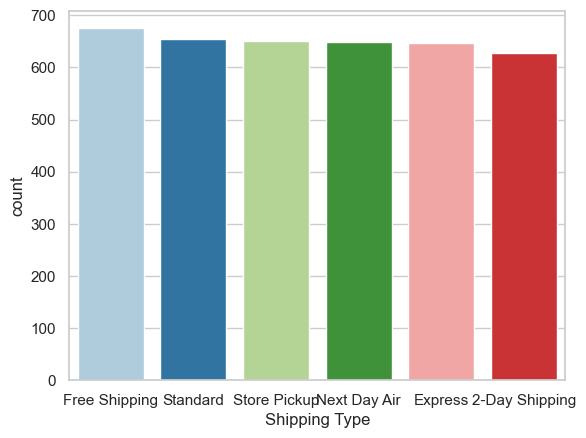

In [408]:
sns.barplot(data = shipping_type ,x ="Shipping Type",y = "count" ,palette="Paired")
plt.show()

### Most Preferred Shipping Type among Locations

In [410]:
ship_loc = pd.crosstab(df["Location"], columns=df["Shipping Type"])
ship_loc

Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Location,,,,,,
Alabama,16,20,9,17,8,19
Alaska,13,13,14,8,17,7
Arizona,10,12,10,11,10,12
Arkansas,12,16,14,17,11,9
California,14,16,16,20,16,13
Colorado,12,4,13,14,14,18
Connecticut,16,11,6,18,12,15
Delaware,14,14,20,16,9,13
Florida,10,14,17,8,13,6


In [413]:
most_preferred = pd.DataFrame(ship_loc.idxmax(axis=1)).rename(columns={0:"Most Preferred Shipping Type"})
most_preferred

,Most Preferred Shipping Type
Location,
Alabama,Express
Alaska,Standard
Arizona,Express
Arkansas,Next Day Air
California,Next Day Air
Colorado,Store Pickup
Connecticut,Next Day Air
Delaware,Free Shipping
Florida,Free Shipping


### Discount Applied
Most orders **do not have any discount applied** with a total of **2223**. Whilst the total no. of orders with **discount applied** is **1677**.

In [414]:
discount = pd.crosstab(df["Discount Applied"],columns="counts")
discount

col_0,counts
Discount Applied,
No,2223
Yes,1677


array([<Axes: >], dtype=object)

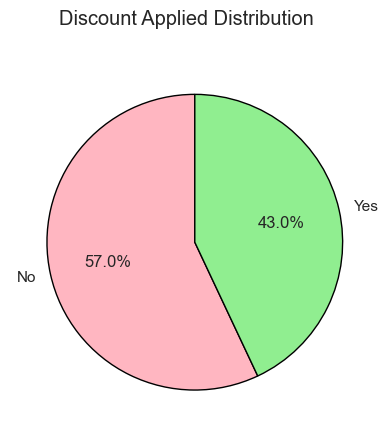

In [415]:
discount.plot(kind="pie", subplots=True, xlabel="", ylabel="", title="Discount Applied Distribution", 
              autopct='%1.1f%%', startangle=90, legend=False, colors=["lightpink", "lightgreen"], 
             wedgeprops={"edgecolor": "black"})

In [417]:
promo = pd.crosstab(df["Promo Code Used"], columns="counts")
promo

col_0,counts
Promo Code Used,
No,2223
Yes,1677


array([<Axes: >], dtype=object)

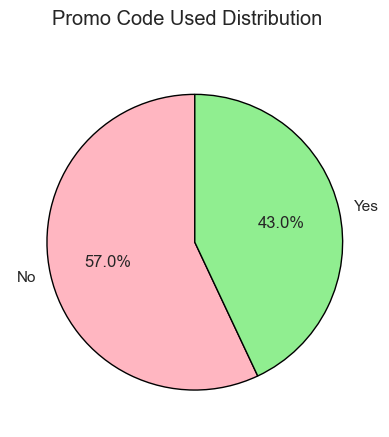

In [421]:
promo.plot(kind="pie", subplots=True, xlabel="", ylabel="", title="Promo Code Used Distribution", 
              autopct='%1.1f%%', startangle=90, legend=False, colors=["lightpink", "lightgreen"], 
             wedgeprops={"edgecolor": "black"})

### Frequency of Purchases
Most consumers purchase **every 3 months**, followed by those who purchased **annually, quarterly, and monthly.**

In [426]:
fre_purchase = pd.crosstab(df["Frequency of Purchases"],columns="Counts",)
fre_purchase.sort_values(by = "Counts",ascending= False)

col_0,Counts
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


<Axes: title={'center': 'Frequency of Orders'}, xlabel='no. of customers', ylabel='frequency'>

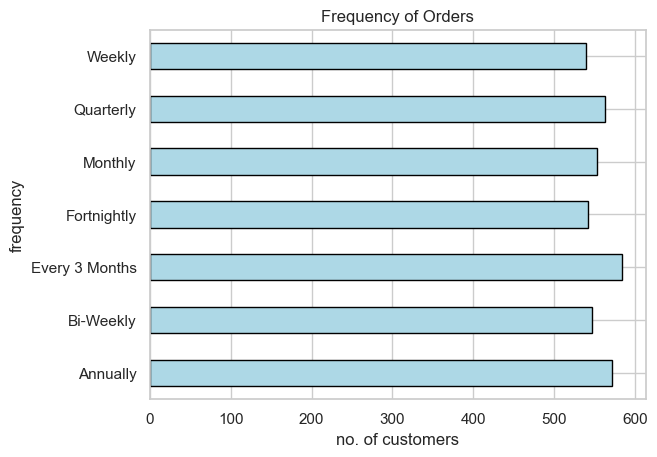

In [428]:
fre_purchase.plot.barh(title="Frequency of Orders", xlabel="no. of customers", ylabel="frequency", 
                   grid=True, legend=False, color="lightblue", edgecolor="black")

### Previous Purchases
- The highest number of previous purchases is 50, with a total of 77 customers.
- The most common number of previous purchases among customers is 37.

In [435]:
prev_purchase = df["Previous Purchases"].value_counts().reset_index().head()
prev_purchase 


,Previous Purchases,count
0,31,97
1,21,96
2,14,92
3,4,91
4,3,91


In [441]:
prev_purchase = prev_purchase.sort_values(by ="count")
prev_purchase

,Previous Purchases,count
3,4,91
4,3,91
2,14,92
1,21,96
0,31,97


<Axes: title={'center': 'Frequency of Previous Purchases'}, xlabel='No. of Previous Purchases', ylabel='No. of Customers'>

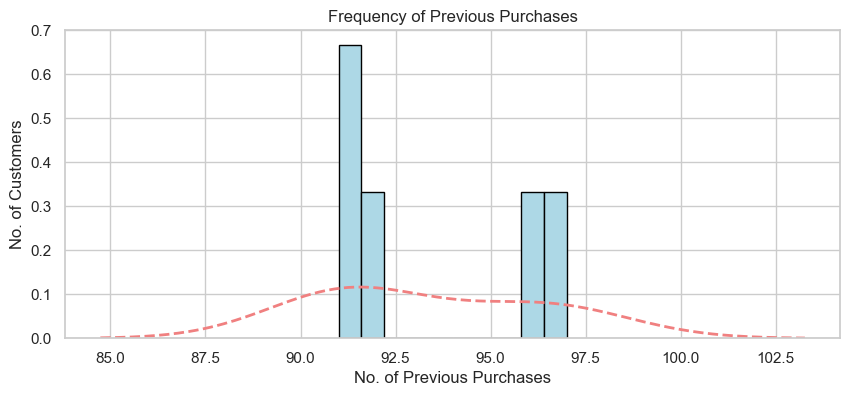

In [447]:
ax = prev_purchase.plot.hist(y="count", color="lightblue", edgecolor="black", 
                             title="Frequency of Previous Purchases", 
                             xlabel="No. of Previous Purchases", ylabel="No. of Customers",
                             grid=True, legend=False, figsize=(10, 4), density=True)
sns.kdeplot(prev_purchase["count"], color="lightcoral", lw=2, linestyle="--")


### Previous Purchases Among Age Groups
The **Seniors** tend to have more previous purchases compared to other age groups, which is then followed by **Adults** and **Young Adults**. Meanwhile, **Teenangers** have the lowest mean for previous purchases.

In [449]:
age_prevpur = df.groupby("Age")["Previous Purchases"].mean()
age_prevpur = pd.DataFrame(age_prevpur).rename_axis("Age Groups")

age_prevpur

C:\Users\nitin\AppData\Local\Temp\ipykernel_7964\2746215112.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prevpur = df.groupby("Age")["Previous Purchases"].mean()


,Previous Purchases
Age Groups,
children,NaN
teenagers,22.893333
young adults,24.938951
adults,25.539352
seniors,26.388759


<Axes: title={'center': 'Previous Purchases Vs. Age Groups'}, xlabel='no. of previous purchases', ylabel='age group'>

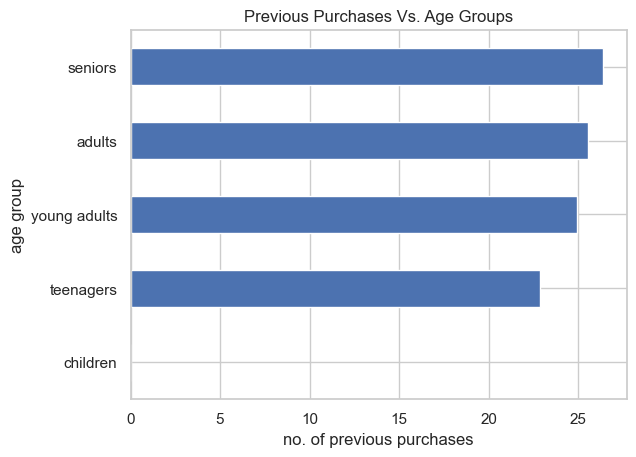

In [450]:
age_prevpur.plot.barh(grid=True, legend=False, xlabel="no. of previous purchases", ylabel="age group", 
                      title="Previous Purchases Vs. Age Groups")